# Linear Regression

In this notebook we explore the linear regression model, including its implementation by normal equations and by gradient descent.

## Setup

Lets start with some imports

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

The following line imports our own library where we should have the implementations ready.

In [3]:
import lib
%load_ext autoreload
%autoreload 2

The following function is just a convenient way to plot the data and models we will be using throught the notebook

In [4]:
def make_plot(X_train, y_train, X_test=None, y_test=None, model=None, feature_extractor=None):
    
    fig, ax = plt.subplots()
    
    xmin = np.min(X_train)
    xmax = np.max(X_train)

    if X_test is not None:
        xmin = min(np.min(X_test), xmin)
        xmax = max(np.max(X_test), xmax)
        ax.scatter(X_test[:, 0], y_test, label='Test', c='tab:green', alpha=0.6)
    
    if model is not None:
        X_real = np.linspace(xmin, xmax, 1000000).reshape(-1,1)
        if feature_extractor is not None:
            X_real = feature_extractor(X_real)
        y_pred = model.predict(X_real)
        ax.plot(X_real[:, 0], y_pred, label='Model', c='tab:orange')
    
    ax.scatter(X_train[:, 0], y_train, label='Train', c='tab:blue', alpha=0.6)
    
    ax.legend()
    plt.show()

Now we must import our toy dataset

In [5]:
data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
X, y = data[:, :1], data[:, 1]

and split it in *Train* and *Test* sets, one for training the model and the other to estimate how it will perform when faced un data it has not previously seen.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Data Exploration

For this we are only suppose to look at our training data, because otherwise we may not estimate the performance of our model appropriately.

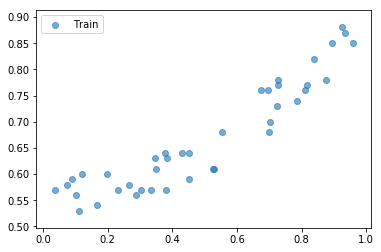

In [7]:
make_plot(X_train, y_train)

we can see that it is not precisely a straight line, but we can approximate it with one anyway.

## Training

Now we are ready to train our linear regression model, we will first train it with the normal equations method and then with the gradient descent method.

**Normal Equations**

In [8]:
model = lib.LinearRegression()

Since the model is not trained yet, we get an error when we try to get the coeficients

In [9]:
model.coef

RuntimeError: You must fit the model first

(the same will happen if we attempt to make predictions with it, so we can't use the nice plotting function we defined above). Now let us finally train our first linear regression model using the normal equations

In [11]:
model.fit(X_train, y_train, method='normal equations')

Now we can access the coefficients and make predictions

In [12]:
model.coef

array([0.50123072, 0.3378766 ])

Let us plot the model!

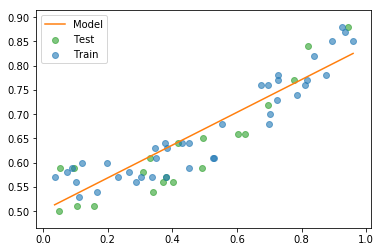

In [13]:
make_plot(X_train, y_train, X_test, y_test, model)

We can see our model tries to follow the general trend but de data does not lie inteirely on our prediction line, let us compute the mean squared error in the train and test sets

In [14]:
y_pred = model.predict(X_train)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = model.predict(X_test)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

Mean Squared Error on train set: 0.001456
Mean Squared Error on test set: 0.002531


That is life, there are some errors we have learn to live with. Now let us see how it goes with the gradient descent method, do you think we will do better?

**Gradient Descent**

In [29]:
model = lib.LinearRegression()
model.fit(X_train, y_train, method='gradient descent')

Now that we have trained our model, let us see what coefficients it has found

In [30]:
model.coef

array([0.93323385, 0.0460832 ])

they seem totally different from those of the normal equations, let us plot the model, perhaps this coefficients are also worthy

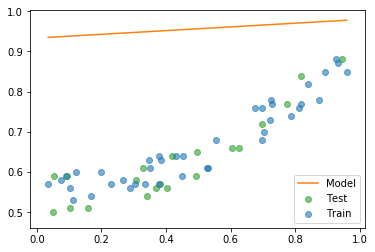

In [31]:
make_plot(X_train, y_train, X_test, y_test, model)

That is horrible! How come we have such a bad model? is it a bad implementation? Not neccessarily!

Gradient descent is an iterative method with several parameters to tune, this parameters have to be tuned for every dataset, but we have stored learning curves in our models, they may help us debug a little.

In [32]:
model.learning_curves

{'loss': (0.1121750148947918,
  0.1097253463881824,
  0.10733645899408625,
  0.1050068354155385,
  0.10273499624376989,
  0.10051949901209248,
  0.09835893727341019,
  0.09625193970076588,
  0.09419716921034851,
  0.0921933221063993),
 'weights': (array([[0.96342729],
         [0.05888556]]), array([[0.9602103 ],
         [0.05750468]]), array([[0.95703212],
         [0.05614417]]), array([[0.95389228],
         [0.05480378]]), array([[0.95079028],
         [0.05348325]]), array([[0.94772566],
         [0.05218234]]), array([[0.94469794],
         [0.05090079]]), array([[0.94170666],
         [0.04963836]]), array([[0.93875137],
         [0.0483948 ]]), array([[0.93583162],
         [0.04716989]]))}

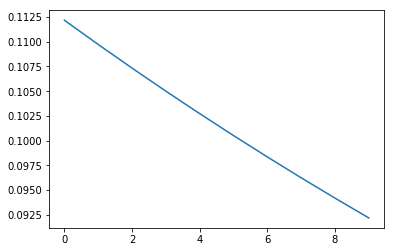

In [33]:
plt.plot(model.learning_curves['loss'])

The loss function seems to be decreasing, perhaps the algorithm was not given enough training steps, let us try again

In [44]:
model = lib.LinearRegression()
model.fit(X_train, y_train, method='gradient descent', num_iterations=50000)

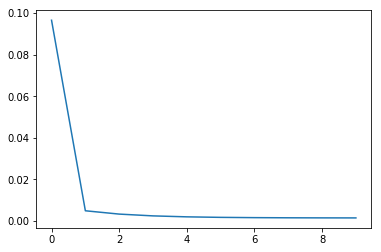

In [46]:
plt.plot(model.learning_curves['loss'])

From the above learning curve we can se our model has converged to a low training error, let us see the model again

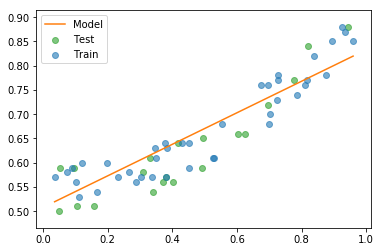

In [47]:
make_plot(X_train, y_train, X_test, y_test, model)

It seems very similar to the model found by the normal equations, but we can make sure looking at the coefficients and the mean squared error of this model

In [48]:
model.coef

array([0.50804486, 0.32502259])

In [49]:
y_pred = model.predict(X_train)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = model.predict(X_test)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

Mean Squared Error on train set: 0.001469
Mean Squared Error on test set: 0.002627


They certainly are a bit different from the ones found by the normal equations, but it does not mean they are not right (as the picture above shows). It is hard to tell which alternative is better, as a rule of thumb you should alway choose the one with lower error on the test set.

The previous result does not imply that gradient descent is useless. In fact, there are many cases where gradient descent is our most reliable choice, for instance, using the normal equations we need to invert a matrix and we know from linear algebra than some matrices can't be inverted.

That is it! you now have a working implementation of a linear regression model, which you can train using either normal equations or gradient descent, go ahead to the next exercise!